In [1]:
!pip install astro-datasets numpy matplotlib albumentations

     |████████████████████████████████| 9.4 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 79.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 90.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 81.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 53.3 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 55.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 53.3 MB/s eta 0:00:01
     |████████████████████████████████| 48.3 MB 22.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 30.8 MB/s eta 0:00:01
     |████████████████████████████████| 701 kB 53.9 MB/s eta 0:00:01
     |████████████████████████████████| 33.8 MB 56.6 MB/s eta 0:00:01
     |████████████████████████████████| 110 kB 53.5 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 2.8 MB/s  eta 0:00:01
     |██████████████████████████

     |████████████████████████████████| 217 kB 52.8 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 50.5 MB/s eta 0:00:01
  Created wheel for astro-datasets: filename=astro_datasets-0.0.18-py3-none-any.whl size=17643 sha256=840a89986b202cc0602671df4c5e11c1b3a8752a2629eb63662962da7c9ab764
  Stored in directory: /root/.cache/pip/wheels/49/3c/ca/88b0ba2e9c594e7688ac0900c01acf75767069b78afd3424f3
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21485 sha256=85a944219e76daac56469b4ad6c00e44614cb8d8db7845a940c28033dbf7091b
  Stored in directory: /root/.cache/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built astro-datasets promise
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import time, sys, os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import astro_datasets
import matplotlib.pyplot as plt
import albumentations as alb

2022-11-22 14:55:11.351059: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(cmd_train, cmd_test, cmd_val), info = tfds.load(name='cmd', 
                                                 split=['train[0%:90%]','train[90%:95%]','train[95%:100%]'], 
                                                 with_info=True, 
                                                 as_supervised=True, 
                                                 builder_kwargs={'simulation': 'IllustrisTNG', 'field': 'Mtot', 
                                                 'parameters': ['omegam']})

2022-11-22 14:55:14.344452: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/IllustrisTNG_Mtot_omegam/cmd/1.0.4.incompleteHINEVX/cmd-train.tfrecord*...…

Dataset cmd downloaded and prepared to /root/tensorflow_datasets/IllustrisTNG_Mtot_omegam/cmd/1.0.4. Subsequent calls will reuse this data.


2022-11-22 14:59:24.307714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 14:59:26.505694: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78935 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:44:00.0, compute capability: 8.0


In [4]:
(simba_train, simba_test, simba_val), info_simba = tfds.load(name='cmd', 
                                                 split=['train[0%:90%]','train[90%:95%]','train[95%:100%]'], 
                                                 with_info=True, 
                                                 as_supervised=True, 
                                                 builder_kwargs={'simulation': 'SIMBA', 'field': 'Mtot', 
                                                 'parameters': ['omegam']})

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/SIMBA_Mtot_omegam/cmd/1.0.4.incomplete3UZU3P/cmd-train.tfrecord*...:   0%|…

Dataset cmd downloaded and prepared to /root/tensorflow_datasets/SIMBA_Mtot_omegam/cmd/1.0.4. Subsequent calls will reuse this data.


In [5]:
# define preprocessing, normalization and augmentation functions

def normalize(image, label):  
    image = tf.math.asinh(image)
    image = image - 26
    return image, label

def aug_fn(image):
    data = {"image":image}
    aug_data = transforms(**data)
    aug_img = aug_data["image"]
    aug_img = tf.cast(aug_img, tf.float32)
    aug_img = tf.image.resize(aug_img, size=[256, 256])
    return aug_img

def process_data(image, label):
    aug_img = tf.numpy_function(func=aug_fn, inp=[image],\
                                Tout=tf.float32)
    return aug_img, label

def set_shapes(img, label, img_shape=(256, 256, 1)):
    img.set_shape(img_shape)
    label.set_shape(1,)
    return img, label

# Define augmentation pipeline

transforms = alb.Compose([alb.VerticalFlip(p=0.6),
                          alb.HorizontalFlip(p=0.6),
                          alb.RandomRotate90(p=0.6)])


In [6]:
btch_size = 128

In [7]:
cmd_train = cmd_train.repeat(count=3) # increase dataset size
cmd_train = cmd_train.map(process_data)
cmd_train = cmd_train.map(set_shapes)
cmd_train = cmd_train.map(normalize)
cmd_train = cmd_train.batch(btch_size).prefetch(tf.data.AUTOTUNE)

cmd_test = cmd_test.map(normalize)
cmd_test = cmd_test.batch(btch_size).prefetch(tf.data.AUTOTUNE)

cmd_val = cmd_val.map(normalize)
cmd_val = cmd_val.batch(btch_size).prefetch(tf.data.AUTOTUNE)

In [8]:
simba_test = simba_test.map(normalize)
simba_test = simba_test.batch(btch_size).prefetch(tf.data.AUTOTUNE)

In [9]:
H = 7

In [10]:
#design CNN architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(2*H, kernel_size=3, strides=1, padding = 'same', input_shape=(256, 256, 1)),
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(2*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(2*H, kernel_size=2, strides=2, padding = 'valid'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(4*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(4*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(4*H, kernel_size=2, strides=2, padding = 'valid'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),  
  tf.keras.layers.Conv2D(8*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(8*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(8*H, kernel_size=2, strides=2, padding = 'valid'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),    
  tf.keras.layers.Conv2D(16*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(16*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(16*H, kernel_size=2, strides=2, padding = 'valid'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),    
  tf.keras.layers.Conv2D(32*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(32*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(32*H, kernel_size=2, strides=2, padding = 'valid'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(64*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(64*H, kernel_size=3, strides=1, padding = 'same'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),
  tf.keras.layers.Conv2D(64*H, kernel_size=2, strides=2, padding = 'valid'),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),  
  tf.keras.layers.Conv2D(128*H, kernel_size=4, strides=1, padding = 'valid'),  
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LeakyReLU(0.2),  
  tf.keras.layers.Flatten(),  
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64*H),
  tf.keras.layers.LeakyReLU(0.2), 
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 14)      140       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 14)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 14)      1778      
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 14)     56        
 ormalization)                                                   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256, 256, 14)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 14)      798       
                                                        

 leaky_re_lu_17 (LeakyReLU)  (None, 4, 4, 448)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 1, 1, 896)         6423424   
                                                                 
 batch_normalization_17 (Bat  (None, 1, 1, 896)        3584      
 chNormalization)                                                
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 1, 1, 896)         0         
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dropout (Dropout)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 448)               401856    
                                                                 
 leaky_re_

In [11]:
opt = tf.keras.optimizers.Adam(beta_1=0.5, beta_2=0.999)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10)

In [12]:
#compile model, set the optimiser and the loss as defined above 
model.compile(optimizer=opt,
              loss='mae',
              metrics=['mse'])

In [13]:
epochs = 50

In [14]:
checkpoint_path = "./cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 monitor='val_loss',
                                                 mode='min',
                                                 verbose=1,
                                                 save_best_only=True)

model.fit(cmd_train, epochs=epochs, 
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True), reduce_lr, cp_callback], 
          validation_data=cmd_val)

Epoch 1/50


2022-11-22 15:03:41.760396: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2022-11-22 15:03:43.958167: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-22 15:03:44.208565: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x46a9e0e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-22 15:03:44.208622: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2022-11-22 15:03:44.214551: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-11-22 15:03:44.371599: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the pr

317/317 [==============================] - ETA: 0s - loss: 0.2483 - mse: 0.5181
Epoch 1: val_loss improved from inf to 0.28402, saving model to ./cp.ckpt


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


317/317 [==============================] - 114s 312ms/step - loss: 0.2483 - mse: 0.5181 - val_loss: 0.2840 - val_mse: 0.0944 - lr: 0.0010
Epoch 2/50
317/317 [==============================] - ETA: 0s - loss: 0.0844 - mse: 0.0580
Epoch 2: val_loss did not improve from 0.28402
317/317 [==============================] - 86s 272ms/step - loss: 0.0844 - mse: 0.0580 - val_loss: 1.4500 - val_mse: 7.2004 - lr: 0.0010
Epoch 3/50
317/317 [==============================] - ETA: 0s - loss: 0.0599 - mse: 0.0218
Epoch 3: val_loss improved from 0.28402 to 0.09410, saving model to ./cp.ckpt


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


317/317 [==============================] - 101s 318ms/step - loss: 0.0599 - mse: 0.0218 - val_loss: 0.0941 - val_mse: 0.0120 - lr: 0.0010
Epoch 4/50
317/317 [==============================] - ETA: 0s - loss: 0.0406 - mse: 0.0116
Epoch 4: val_loss improved from 0.09410 to 0.02476, saving model to ./cp.ckpt


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


317/317 [==============================] - 94s 295ms/step - loss: 0.0406 - mse: 0.0116 - val_loss: 0.0248 - val_mse: 0.0011 - lr: 0.0010
Epoch 5/50
317/317 [==============================] - ETA: 0s - loss: 0.0322 - mse: 0.0062
Epoch 5: val_loss did not improve from 0.02476
317/317 [==============================] - 89s 281ms/step - loss: 0.0322 - mse: 0.0062 - val_loss: 0.1014 - val_mse: 0.0461 - lr: 0.0010
Epoch 6/50
317/317 [==============================] - ETA: 0s - loss: 0.0288 - mse: 0.0035
Epoch 6: val_loss did not improve from 0.02476
317/317 [==============================] - 91s 287ms/step - loss: 0.0288 - mse: 0.0035 - val_loss: 0.3924 - val_mse: 0.4942 - lr: 0.0010
Epoch 7/50
317/317 [==============================] - ETA: 0s - loss: 0.0270 - mse: 0.0022
Epoch 7: val_loss did not improve from 0.02476
317/317 [==============================] - 86s 270ms/step - loss: 0.0270 - mse: 0.0022 - val_loss: 0.0982 - val_mse: 0.1023 - lr: 0.0010
Epoch 8/50
317/317 [==================

INFO:tensorflow:Assets written to: ./cp.ckpt/assets


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


317/317 [==============================] - 93s 294ms/step - loss: 0.0173 - mse: 7.4078e-04 - val_loss: 0.0147 - val_mse: 8.4788e-04 - lr: 3.0000e-04
Epoch 16/50
317/317 [==============================] - ETA: 0s - loss: 0.0169 - mse: 6.8155e-04
Epoch 16: val_loss did not improve from 0.01472
317/317 [==============================] - 91s 286ms/step - loss: 0.0169 - mse: 6.8155e-04 - val_loss: 0.0277 - val_mse: 0.0012 - lr: 3.0000e-04
Epoch 17/50
317/317 [==============================] - ETA: 0s - loss: 0.0168 - mse: 6.7423e-04
Epoch 17: val_loss did not improve from 0.01472
317/317 [==============================] - 87s 273ms/step - loss: 0.0168 - mse: 6.7423e-04 - val_loss: 0.0346 - val_mse: 0.0018 - lr: 3.0000e-04
Epoch 18/50
317/317 [==============================] - ETA: 0s - loss: 0.0168 - mse: 6.6918e-04
Epoch 18: val_loss did not improve from 0.01472
317/317 [==============================] - 91s 286ms/step - loss: 0.0168 - mse: 6.6918e-04 - val_loss: 0.0216 - val_mse: 0.0036 -

INFO:tensorflow:Assets written to: ./cp.ckpt/assets


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


317/317 [==============================] - 93s 294ms/step - loss: 0.0170 - mse: 6.5914e-04 - val_loss: 0.0141 - val_mse: 3.5409e-04 - lr: 3.0000e-04
Epoch 25/50
317/317 [==============================] - ETA: 0s - loss: 0.0169 - mse: 6.6752e-04
Epoch 25: val_loss improved from 0.01414 to 0.01304, saving model to ./cp.ckpt


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


317/317 [==============================] - 95s 301ms/step - loss: 0.0169 - mse: 6.6752e-04 - val_loss: 0.0130 - val_mse: 3.1114e-04 - lr: 3.0000e-04
Epoch 26/50
317/317 [==============================] - ETA: 0s - loss: 0.0168 - mse: 6.9702e-04
Epoch 26: val_loss did not improve from 0.01304
317/317 [==============================] - 89s 280ms/step - loss: 0.0168 - mse: 6.9702e-04 - val_loss: 0.0244 - val_mse: 0.0012 - lr: 3.0000e-04
Epoch 27/50
317/317 [==============================] - ETA: 0s - loss: 0.0165 - mse: 6.5291e-04
Epoch 27: val_loss did not improve from 0.01304
317/317 [==============================] - 87s 274ms/step - loss: 0.0165 - mse: 6.5291e-04 - val_loss: 0.0204 - val_mse: 8.1840e-04 - lr: 3.0000e-04
Epoch 28/50
317/317 [==============================] - ETA: 0s - loss: 0.0165 - mse: 6.4944e-04
Epoch 28: val_loss did not improve from 0.01304
317/317 [==============================] - 87s 274ms/step - loss: 0.0165 - mse: 6.4944e-04 - val_loss: 0.0194 - val_mse: 7.58

INFO:tensorflow:Assets written to: ./cp.ckpt/assets


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


317/317 [==============================] - 97s 305ms/step - loss: 0.0159 - mse: 6.5113e-04 - val_loss: 0.0130 - val_mse: 3.2092e-04 - lr: 3.0000e-04
Epoch 36/50
317/317 [==============================] - ETA: 0s - loss: 0.0136 - mse: 3.9932e-04
Epoch 36: val_loss did not improve from 0.01304
317/317 [==============================] - 89s 280ms/step - loss: 0.0136 - mse: 3.9932e-04 - val_loss: 0.0159 - val_mse: 4.6478e-04 - lr: 9.0000e-05
Epoch 37/50
317/317 [==============================] - ETA: 0s - loss: 0.0130 - mse: 3.6030e-04
Epoch 37: val_loss improved from 0.01304 to 0.00898, saving model to ./cp.ckpt


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


317/317 [==============================] - 96s 303ms/step - loss: 0.0130 - mse: 3.6030e-04 - val_loss: 0.0090 - val_mse: 1.2784e-04 - lr: 9.0000e-05
Epoch 38/50
317/317 [==============================] - ETA: 0s - loss: 0.0129 - mse: 3.4920e-04
Epoch 38: val_loss did not improve from 0.00898
317/317 [==============================] - 89s 279ms/step - loss: 0.0129 - mse: 3.4920e-04 - val_loss: 0.0128 - val_mse: 2.8505e-04 - lr: 9.0000e-05
Epoch 39/50
317/317 [==============================] - ETA: 0s - loss: 0.0128 - mse: 3.5150e-04
Epoch 39: val_loss did not improve from 0.00898
317/317 [==============================] - 89s 280ms/step - loss: 0.0128 - mse: 3.5150e-04 - val_loss: 0.0109 - val_mse: 2.0841e-04 - lr: 9.0000e-05
Epoch 40/50
317/317 [==============================] - ETA: 0s - loss: 0.0125 - mse: 3.3421e-04
Epoch 40: val_loss did not improve from 0.00898
317/317 [==============================] - 87s 274ms/step - loss: 0.0125 - mse: 3.3421e-04 - val_loss: 0.0099 - val_mse: 

INFO:tensorflow:Assets written to: ./cp.ckpt/assets


INFO:tensorflow:Assets written to: ./cp.ckpt/assets


317/317 [==============================] - 95s 300ms/step - loss: 0.0099 - mse: 2.1732e-04 - val_loss: 0.0088 - val_mse: 1.3385e-04 - lr: 2.7000e-05
Epoch 49/50
317/317 [==============================] - ETA: 0s - loss: 0.0096 - mse: 2.0709e-04
Epoch 49: val_loss did not improve from 0.00877
317/317 [==============================] - 88s 278ms/step - loss: 0.0096 - mse: 2.0709e-04 - val_loss: 0.0105 - val_mse: 1.7983e-04 - lr: 2.7000e-05
Epoch 50/50
317/317 [==============================] - ETA: 0s - loss: 0.0095 - mse: 2.0419e-04
Epoch 50: val_loss did not improve from 0.00877
317/317 [==============================] - 101s 319ms/step - loss: 0.0095 - mse: 2.0419e-04 - val_loss: 0.0090 - val_mse: 1.4655e-04 - lr: 2.7000e-05


In [15]:
best_model = tf.keras.models.load_model(checkpoint_path)

In [16]:
best_model.evaluate(cmd_test)

6/6 [==============================] - 1s 29ms/step - loss: 0.0084 - mse: 1.1449e-04


[0.008395535871386528, 0.00011448750592535362]

In [17]:
best_model.evaluate(simba_test)

6/6 [==============================] - 0s 27ms/step - loss: 0.0094 - mse: 1.4351e-04


[0.009406308643519878, 0.0001435132435290143]

In [18]:
yhat_cmd = best_model.predict(cmd_test)

6/6 [==============================] - 1s 23ms/step


In [19]:
yhat_simba = best_model.predict(simba_test)

6/6 [==============================] - 0s 23ms/step


In [20]:
lbl_cmd = np.concatenate([y for x, y in cmd_test], axis=0)

In [21]:
lbl_simba = np.concatenate([y for x, y in simba_test], axis=0)

In [22]:
yhat_cmd.shape

(750, 1)

In [23]:
lbl_cmd.shape

(750, 1)

In [24]:
np.mean(np.abs((lbl_cmd - yhat_cmd) / lbl_cmd))

0.032704398

In [25]:
np.mean(np.abs((lbl_simba - yhat_simba) / lbl_simba))

0.03715317

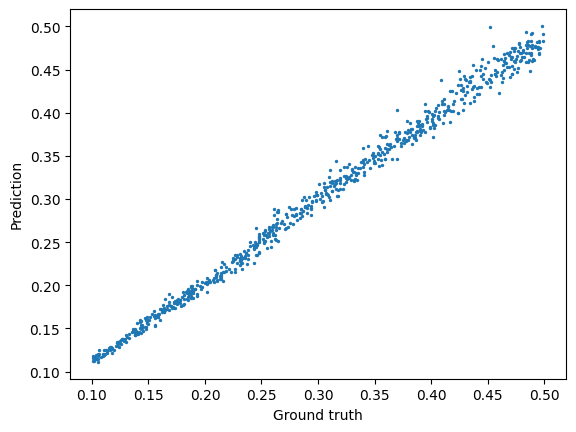

In [26]:
plt.scatter(lbl_cmd, yhat_cmd, s=2)
plt.xlabel('Ground truth')
plt.ylabel('Prediction')

plt.show()